In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob
import math
import seaborn as sns
from matplotlib import cm
import os

genltl_csvs = [
    'ccj-alpha_1..12.csv',
    'rv-counter_1..12.csv',
    'ccj-beta-prime_1..12.csv',
    'tv-uu_1..12.csv',
    'kr-n_1..4.csv',
    'pps-arbiter-standard_1..4.csv'
]

csvs = [
    'ba-known.ltl.csv', 'misc.csv',
    'ba-new-fair2.ltl.neg.csv', 'pps-arbiter-standard_1..4.csv',
    'ba-new-fair2.ltl.pos.csv', 'rv-counter_1..12.csv',
    'ba-new.ltl.neg.csv', 'tgba-known.ltl.csv',
    'ba-new.ltl.pos.csv', 'tgba-new-fair2.ltl.neg.csv',
    'ba-new-strong1.ltl.neg.csv', 'tgba-new-fair2.ltl.pos.csv',
    'ba-new-strong1.ltl.pos.csv', 'tgba-new.ltl.neg.csv',

    'ba-new-strong2.ltl.neg.csv', 'tgba-new.ltl.pos.csv',
    'ba-new-strong2.ltl.pos.csv', 'tgba-new-strong1.ltl.neg.csv',
    'ba-new-weak3.ltl.neg.csv', 'tgba-new-strong1.ltl.pos.csv',
    'ba-new-weak3.ltl.pos.csv',
    'tgba-new-strong2.ltl.neg.csv',

    
    'ccj-alpha_1..12.csv', 'tgba-new-strong2.ltl.pos.csv',
    'ccj-beta-prime_1..12.csv', 'tgba-new-weak3.ltl.neg.csv',
    'kr-n_1..4.csv', 'tgba-new-weak3.ltl.pos.csv',
    'tv-uu_1..12.csv'

    ]

In [2]:
def load_bench(path):
    df = pd.read_csv(path, comment='#')
    df.dropna(axis=1, how='all', inplace=True)
    df.drop('time_unit', axis=1, inplace=True)
    df['deg'] = df['edges'] / df['states']
    return df

def load_all(path):
    first = True
    all_bench = None

    for csv in csvs:
        try:
            tmp = load_bench(path + '/' + csv)

            if csv in genltl_csvs:
                tmp['source'] = 'genltl/' + csv[:-4]
            else:
                tmp['source'] = 'babiak.spin.13/' + csv[:-4]

            if first:
                all_bench = tmp
                first = False
            else:
                all_bench = all_bench.append(tmp)
        except:
            print('Fail to load', csv)
            pass
    try:        
        tmp = load_bench(path + '/misc.csv')
        tmp['source'] = 'rabbit + circuits'
        all_bench = all_bench.append(tmp)
    except:
        pass
        
    return all_bench


In [3]:
b = load_all('results/sbacc_sim_vs_bab')

In [4]:
new = b[b['name'].str.match('sim//*')]
old = b[b['name'].str.match('babiak//*')]

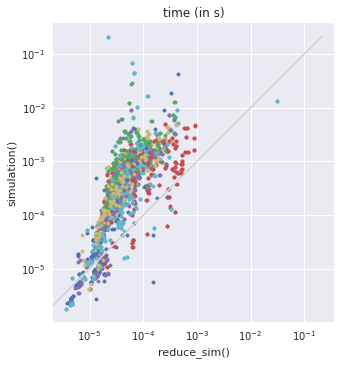

In [5]:
with plt.style.context('seaborn'):
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xscale('log')
    ax.set_yscale('log')

    max_val = 0
    
    cmap = matplotlib.cm.get_cmap('Set3')
    i = 0
    for k,d in new.groupby('source'):
#        if i != 11:
#            i += 1
#            continue
        b1 = new[new['source'] == k]
        b2 = old[old['source'] == k]
        ax.scatter(b1['real_time']/10**9, b2['real_time']/10**9, marker='.')#color=cmap(i), label=k)
        i += 1
        max_val = max(max_val, np.max(b1['real_time']/10**9), np.max(b2['real_time']/10**9))
    plt.plot([0, max_val], [0, max_val], c='lightgrey')

plt.title('time (in s)')
plt.xlabel('reduce_sim()')
plt.ylabel('simulation()')
#plt.legend()
plt.show()

In [6]:
# States reduction
print('diff', np.sum(new['red_states'].values != old['red_states'].values))
print('same', np.sum(new['red_states'].values == old['red_states'].values))

diff 1319
same 940


In [7]:
np.sum(new['red_states'].values > old['red_states'].values)

1255

In [8]:
np.sum(new['red_states'].values < old['red_states'].values)

64

In [9]:
np.unique(new[new['red_states'].values < old['red_states'].values]['source'].values)

array(['babiak.spin.13/ba-new-fair2.ltl.neg',
       'babiak.spin.13/ba-new-strong1.ltl.neg',
       'babiak.spin.13/ba-new-weak3.ltl.neg',
       'babiak.spin.13/ba-new.ltl.neg', 'babiak.spin.13/ba-new.ltl.pos',
       'babiak.spin.13/tgba-new-fair2.ltl.neg',
       'babiak.spin.13/tgba-new-strong1.ltl.neg',
       'babiak.spin.13/tgba-new-weak3.ltl.neg',
       'babiak.spin.13/tgba-new.ltl.neg',
       'babiak.spin.13/tgba-new.ltl.pos'], dtype=object)

In [10]:
old[new['red_states'].values < old['red_states'].values]

name  iterations  real_time   cpu_time  det  edges  red_det  \
124  babiak/26        2780   245994.0   245891.0    5     18        4   
133  babiak/35        1450   483180.0   482665.0    7     29        4   
137  babiak/39         623  1139090.0  1137910.0    9     41        6   
138  babiak/40         586  1205340.0  1203980.0   18     87        7   
157  babiak/59         530  1331070.0  1330350.0   11     53        6   
..         ...         ...        ...        ...  ...    ...      ...   
137  babiak/39         242  2907970.0  2906300.0    9     47        6   
138  babiak/40         301  2351900.0  2350400.0   18     93        7   
157  babiak/59         195  3518520.0  3516440.0   11     59        6   
163  babiak/65        3609   198890.0   198799.0    3     18        2   
166  babiak/68         416  1674250.0  1673280.0    9     49        6   

     red_edges  red_states  states       deg  \
124         14           6       7  2.571429   
133         18           7       9  3.222222   
137         35          10      11  3.727273   
138         37          11      20  4.350000   
157         25           8      13  4.076923   
..         ...         ...     ...       ...   
137         41          12      13  3.615385   
138         43          13      22  4.227273   
157         31          10      15  3.933333   
163         18           8       8  2.250000   
166         49          13      13  3.769231   

                                    source  
124    babiak.spin.13/ba-new-fair2.ltl.neg  
133    babiak.spin.13/ba-new-fair2.ltl.neg  
137    babiak.spin.13/ba-new-fair2.ltl.neg  
138    babiak.spin.13/ba-new-fair2.ltl.neg  
157    babiak.spin.13/ba-new-fair2.ltl.neg  
..                                     ...  
137  babiak.spin.13/tgba-new-weak3.ltl.neg  
138  babiak.spin.13/tgba-new-weak3.ltl.neg  
157  babiak.spin.13/tgba-new-weak3.ltl.neg  
163  babiak.spin.13/tgba-new-weak3.ltl.neg  
166  babiak.spin.13/tgba-new-weak3.ltl.neg  

[64 rows x 12 columns]